In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the MovieLens Dataset

In [3]:
movies = pd.read_csv('/home/maria/Django-Onboarding/recommendation/movies.csv')
ratings = pd.read_csv('/home/maria/Django-Onboarding/recommendation/ratings.csv')

## Data exploration

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.tail()

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


> It can be seen from the below table that the min and max rating from the user is 0.5 and 5.0 respectively. The average rating value is 3.5.

> total user = 668

>total movie = 149532

In [6]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [7]:
dataset = pd.merge(movies, ratings, how='left', on='movieId')

In [8]:
dataset.tail()

,movieId,title,genres,userId,rating,timestamp
105338,148238,A Very Murray Christmas (2015),Comedy,475.0,3.0,1.451213e+09
105339,148626,The Big Short (2015),Drama,458.0,4.0,1.452015e+09
105340,148626,The Big Short (2015),Drama,576.0,4.5,1.451688e+09
105341,148626,The Big Short (2015),Drama,668.0,4.5,1.451148e+09
105342,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),475.0,4.0,1.451223e+09


In [9]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08


## List of all Genres

In [10]:
genres = []
for genre in movies.genres:
    x = genre.split('|')
    #print(x)
    for i in x:
        if(i not in genres):
            genres.append(str(i))

In [11]:
genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'War',
 'Musical',
 'Documentary',
 'Western',
 'Film-Noir',
 '(no genres listed)']

## List of all Movie titles

In [12]:
movies.title.describe()

count                    10329
unique                   10327
top       Men with Guns (1997)
freq                         2
Name: title, dtype: object

In [13]:
titles = []
for title in movies.title:
    if(title not in titles):
        titles.append(str(title))

In [14]:
titles

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Waiting to Exhale (1995)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Tom and Huck (1995)',
 'Sudden Death (1995)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Dracula: Dead and Loving It (1995)',
 'Balto (1995)',
 'Nixon (1995)',
 'Cutthroat Island (1995)',
 'Casino (1995)',
 'Sense and Sensibility (1995)',
 'Four Rooms (1995)',
 'Ace Ventura: When Nature Calls (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Powder (1995)',
 'Leaving Las Vegas (1995)',
 'Othello (1995)',
 'Now and Then (1995)',
 'Persuasion (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Dangerous Minds (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Wings of Courage (1995)',
 'Babe (1995)',
 'Carrington (1995)',
 'Dead Man Walking (1995)',
 'Clueless (1995)',


## Movies that received the highest number of ratings from User
 
number of ratings from different user for a single movie 

In [15]:
highest_number_of_rating = dataset.groupby('title')[['rating']].count()

# List of 10 movies with high number of ratings
highest_number_of_rating = highest_number_of_rating.nlargest(10, 'rating')

In [16]:
highest_number_of_rating.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


In [17]:
highest_number_of_rating.shape

(10, 1)

## Movies rated by users

In [18]:
table = dataset.pivot_table(index='title', columns='userId', values='rating')

In [19]:
table.shape

(10323, 668)

In [20]:
table.tail()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0
title,,,,,,,,,,,,,,,,,,,,,
loudQUIETloud: A Film About the Pixies (2006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡Three Amigos! (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
À nous la liberté (Freedom for Us) (1931),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [21]:
table.head(10)

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


## Classifying different ratings

<AxesSubplot:>

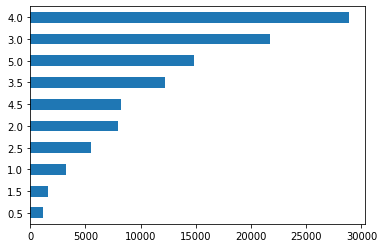

In [22]:

dataset.rating.value_counts().sort_values().plot(kind='barh')

## Collaborative filtering with KNN (K- nearest neighbor)

In [23]:
from scipy.sparse import csr_matrix
from  sklearn.neighbors import NearestNeighbors

In [24]:
table

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
table = table.fillna(0)

In [26]:
table

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
table.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 2.5],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 2. ],
       [0. , 0. , 0. , ..., 0. , 0. , 3. ]])

In [28]:
matrix = csr_matrix(table.values)

In [29]:
model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### table.shape[0] = 668 (all the userId)
#### table.shape[1] = 10323 ( all the book titles)
> we are randomly choosing a book tiltle to get recommendations for that specific book.

In [30]:
user_query_index = np.random.choice(table.shape[1])
user_query_index

37

#### We are randomly choosing a a movie to generate recommendation for using KNN

In [31]:
table.index[user_query_index]

'1408 (2007)'

In [32]:
table.iloc[user_query_index, :]

userId
1.0      0.0
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
        ... 
664.0    0.0
665.0    3.0
666.0    0.0
667.0    0.0
668.0    1.0
Name: 1408 (2007), Length: 668, dtype: float64

In [33]:
distances, indices = model_knn.kneighbors(table.iloc[user_query_index, :].values.reshape(1, -1), n_neighbors = 6)

## Generating recommendation using KNN for the selected movie

In [34]:
for i in range(0, len(distances.flatten())):
    # the below line will be printed anyway
    # we always start i = 0
    # just getting the variable i ready to print for which book we are
    # generating the recommendation for:
    if i == 0:
        print('Recommendation for {0}:\n'.format(table.index[user_query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for 1408 (2007):

1: Paranormal Activity 2 (2010), with distance of 0.2815703645163703:
2: Paranormal Activity (2009), with distance of 0.3010794759131058:
3: Hitman (2007), with distance of 0.3144952338425674:
4: Devil (2010), with distance of 0.33592909320537245:
5: Frozen (2010), with distance of 0.3982296076030494:


# Recommendation with Cosine similarity

In [35]:
from sklearn.metrics.pairwise import linear_kernel

In [36]:
cosine = linear_kernel(matrix, matrix)
cosine

array([[ 12.25,   0.  ,   0.  , ...,   0.  ,   7.  ,   0.  ],
       [  0.  ,   9.  ,   0.  , ...,   0.  ,   9.  ,   0.  ],
       [  0.  ,   0.  ,   6.25, ...,   0.  ,   5.  ,   7.5 ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  36.25,   6.  ,   0.  ],
       [  7.  ,   9.  ,   5.  , ...,   6.  , 413.75,   6.  ],
       [  0.  ,   0.  ,   7.5 , ...,   0.  ,   6.  ,   9.  ]])

In [39]:
def recommendations(title):
    idx = user_query_index
    print(idx)
    scores = list(enumerate(cosine[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:5]
    print(scores)
    movie_indices = [i[0] for i in scores]
    print(movie_indices)
    return table.iloc[movie_indices]

In [40]:
recommendations(table.index[user_query_index])

37
[(8136, 183.75), (2289, 180.75), (841, 175.0), (3349, 167.0)]
[8136, 2289, 841, 3349]


userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0
title,,,,,,,,,,,,,,,,,,,,,
"Shawshank Redemption, The (1994)",4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,...,5.0,4.0,0.0,0.0,4.0,0.0,4.5,5.0,0.0,4.0
"Dark Knight, The (2008)",0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,3.5
Batman Begins (2005),4.5,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.5
Forrest Gump (1994),3.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,3.0,4.0,...,4.0,4.0,0.0,0.0,5.0,5.0,4.0,0.0,4.5,4.0
